## Import the Dataset Using Pandas

# Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')




In [41]:
# Load the Dataset
url = url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/diabetes.csv'
diabetesDF = pd.read_csv(url)


In [42]:
# Display the first few rows of the dataset to check its structure
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [43]:
diabetesDF.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [44]:
print(diabetesDF.info())
print(diabetesDF.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [45]:
diabetesDF.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Question 1: Analyze the data in the dataframe and briefly present your most relevant conclusions.


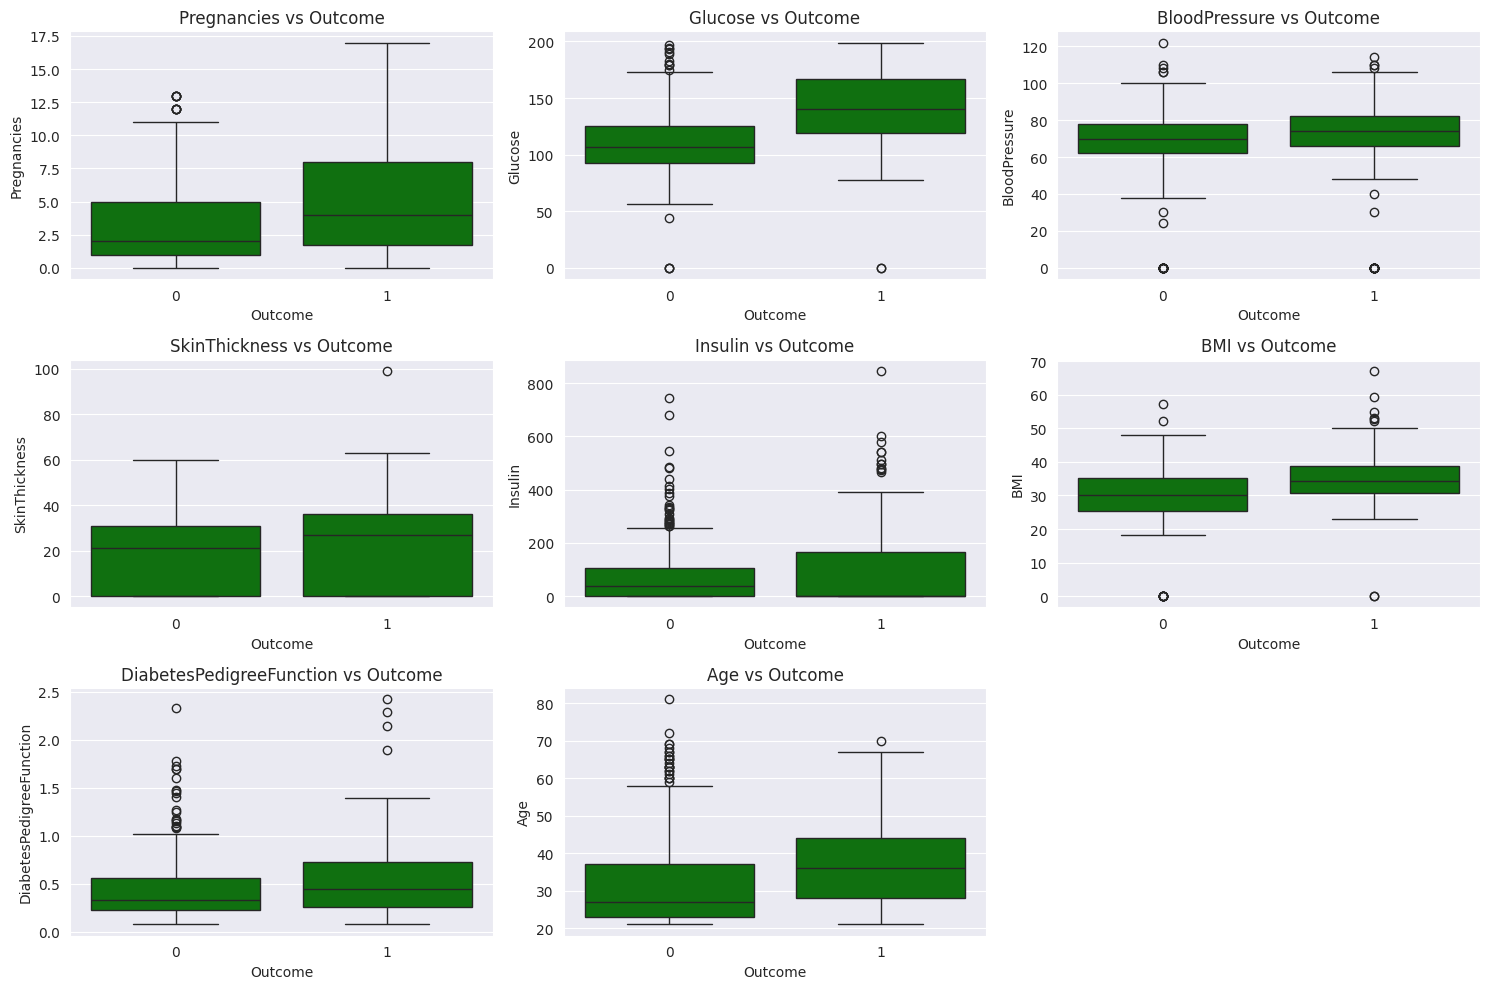

In [46]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetesDF.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Outcome", y=col, data=diabetesDF, color="green")  # Set box color to green
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()


The boxplots above Show features with potential outliers, as seen by the points outside the whiskers of the plots. Outliers can impact model performance by skewing results, especially in sensitive models like linear regression and logistic regression.

The Interquartile Range (IQR) method is applied to deal with this, where any values below the 1st quartile or above the 3rd quartile by 1.5 times the IQR are considered outliers.

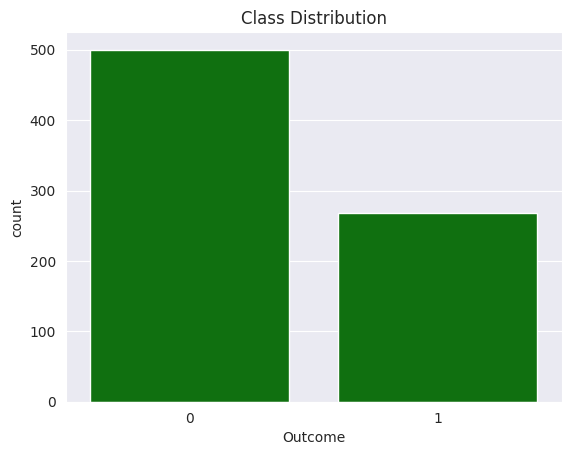

In [47]:
sns.countplot(x="Outcome", data=diabetesDF, palette=["green"])  # Set the color to green
plt.title("Class Distribution")
plt.show()

The target variable `Outcome` is imbalanced, A higher percentage of patients do not have diabetes (`Outcome = 0`) compared to those with diabetes (`Outcome = 1`).

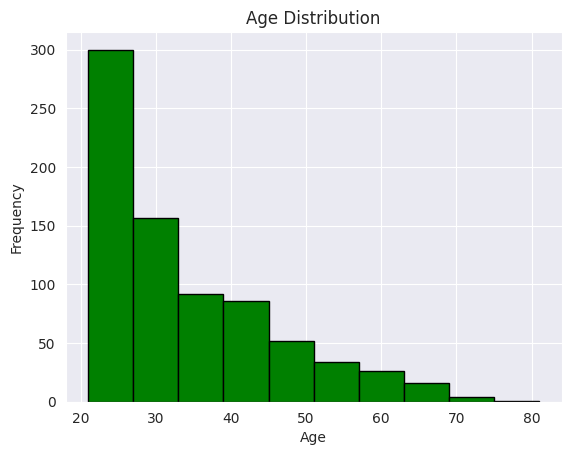

In [48]:
diabetesDF.Age.plot(kind="hist", color="green", edgecolor="black")  # Add black borders to bars
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

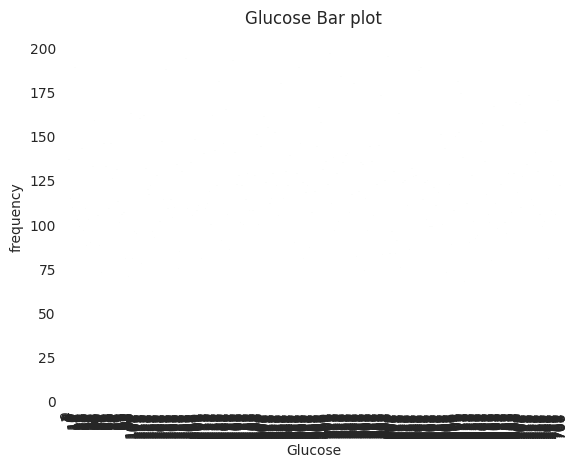

In [49]:
diabetesDF.Glucose.plot(color="green",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

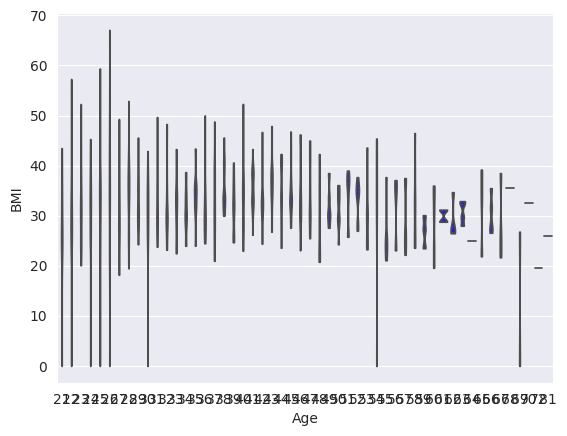

In [50]:
sns.violinplot(data=diabetesDF,x="Age",y="BMI",color="blue",split=False,cut=0,
bw_method =.3, inner="stick")
plt.show()

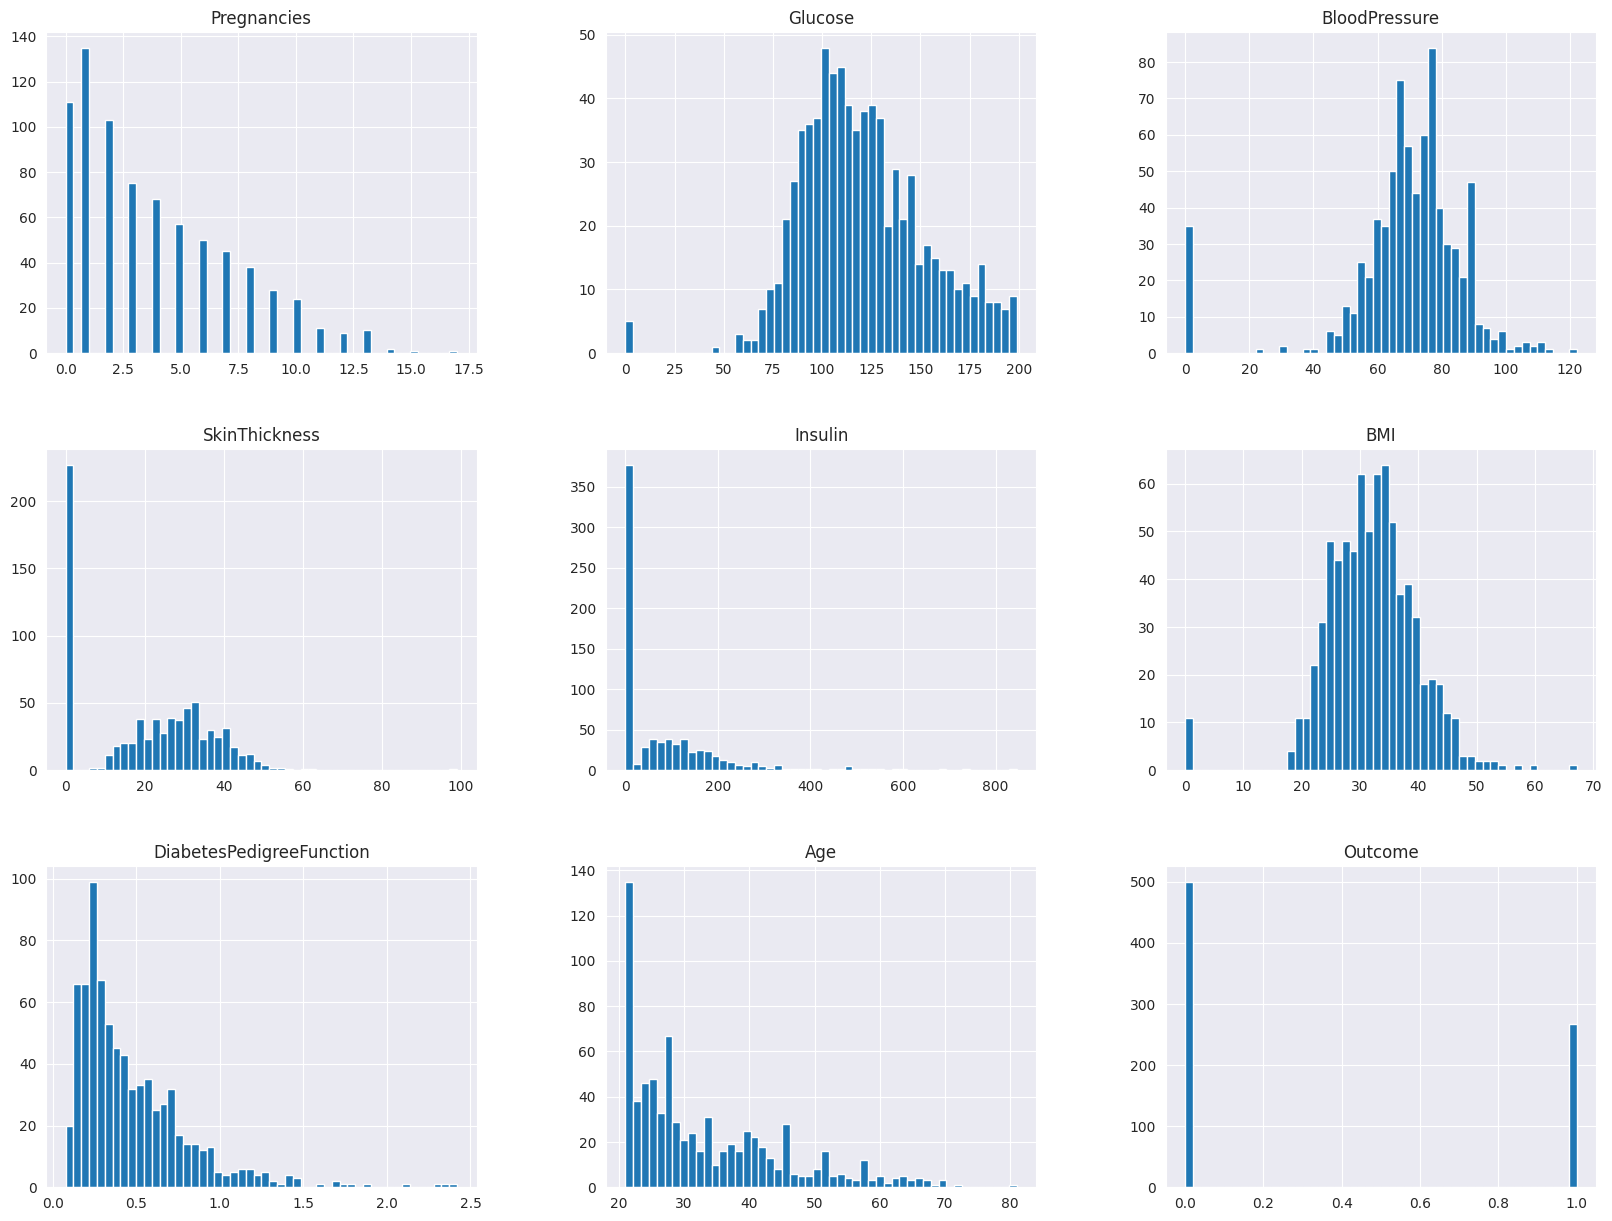

In [51]:
diabetesDF.hist(bins=50, figsize=(20,15))
plt.show()

In [52]:
# let's look at the Corralation matrix of this data
corr_matrix = diabetesDF.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


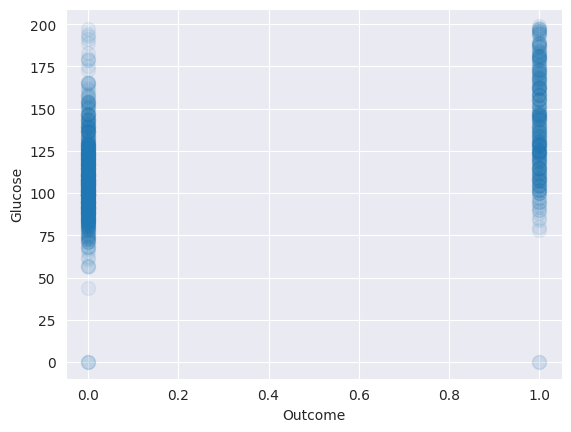

In [53]:
diabetesDF.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)

plt.show()

## Dealing with outliers

In [54]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [55]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

diabetesDF = remove_outliers(diabetesDF, columns)

diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(diabetesDF, test_size=0.1, random_state=42)    # Create, random train and test set


train_df_labels = train_df["Outcome"].copy()                                  # Drop labels
train_df= train_df.drop("Outcome", axis=1)

## Question 2

 using less than 20% of the data for testing might be appropriate:

### 1. **Large Datasets (More than 100,000 data points)**

   -When you have a **very large dataset**, even using a small fraction of the data (e.g., 10% or even 5%) can still provide a representative test set. The reasoning behind this is that, as the dataset size increases, the test set will still contain a sufficient number of samples to effectively evaluate the model's performance.

### 2. **When the Model is Already Well-Validated**

   -If we are working with a model or technique that has already been extensively validated on similar datasets, it may be acceptable to use a smaller test set particularly if the goal is to quickly assess minor updates or changes in the model.

### 3. **Cross-Validation**

   -In cases where **k-fold cross-validation** is used, it is common to use 100% of the data for training across multiple iterations, with different subsets used for testing in each fold. As a result, a smaller portion of the data is tested each time (e.g., 10-fold cross-validation means 10% of the data is used for testing per fold).

### 4. **Time Series or Sequential Data**

   -**time series forecasting** or **sequential data** tasks, data splitting might follow a **rolling window** approach, where only the most recent data (for example, the last few months or years) is used as the test set. This can sometimes result in less than 20% of the data being used for testing because the model is trained on older data.
   
   - **Example**: In stock market prediction

### 5. **Imbalanced Datasets**

   - **class imbalance**, may lead us to use a larger proportion of the data for training to ensure that the model can adequately learn to identify the minority class. This can sometimes mean using a smaller test set, as the primary focus may be on training the model effectively.
   
   - **Example**: In fraud detection or disease detection tasks, where fraudulent or diseased samples are much rarer than non-fraudulent or healthy samples.
### 6. **Online Learning / Incremental Learning**

   -In scenarios where **online learning** or **incremental learning** is employed, models are updated continuously as new data arrives. These models are often tested on a small subset of data that is available at each time step rather than relying on a traditional static test set.
   
   - **Example**: Online learning in recommender systems and real-time fraud detection


---


## Question 3

### Normalizing the Input Data

In [57]:
#Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler                       # This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

SGDClassifier(random_state=42)

In [59]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.76963351, 0.81151832, 0.78421053])

In [60]:
prediction = sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.7517482517482518


In [61]:
model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [62]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.78534031, 0.80628272, 0.80526316])

In [63]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.8094405594405595


Model Evaluation and Metrics
After evaluating the model, we achieve an accuracy of around 89%. However, considering the nature of the dataset, relying solely on accuracy might not give a clear picture of the model's performance. This is especially true for datasets with class imbalance, like this dataset, where most individuals are non-diabetic.

Why Accuracy May Be Misleading:
In an imbalanced dataset, the model might predict a high number of cases as non-diabetic (class 0) and still maintain a high accuracy. This happens because the model is biased toward the majority class.

Accuracy only measures the proportion of correct predictions out of all predictions. However, in this case, more nuanced metrics are needed to assess the model's ability to correctly identify diabetic patients.

Additional Metrics to Consider:
Precision: Measures how many of the predicted positive cases are actually positive. Useful when we care about the correctness of the positive predictions.

In [64]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [65]:
print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, train_df_labels))

SVM Accuracy of Classifier:  0.8986013986013986


In [66]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_labels, y_train_pred)

array([[333,  66],
       [ 76,  97]])

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.5950920245398773
Recall Score: 0.5606936416184971
F1 Score: 0.5773809523809523


##We should not  Normalize trainLabel and testLabel because

### 1. **Binary Labels Represent Classes:**
   - Labels in this case are binary (0 for non-diabetic, 1 for diabetic). If we normalize these values, they could be transformed into values between 0 and 1, which would alter their meaning. The classifier would no longer understand these as distinct classes.

#### 2. **The Labels Represent the True Values, Not Features**
   - **Normalization is typically applied to features ** to ensure that they are on a similar scale, which helps many algorithms (such as gradient-based models) to converge more efficiently and avoid bias toward features with larger values.
   - **Labels (targets) are separate from features** and represent the outcomes that we are trying to predict. Normalizing the labels could distort the actual relationship between the input features and the target values.
   

#### 3. **Labels Are Not in the Same Domain as Features**
   - Features are often numerical inputs that can span a wide range of values (e.g., age, income, height), whereas the **labels** typically represent categorical outcomes (classification tasks) or continuous outcomes (regression tasks) that need to be in their **original scale** for meaningful interpretation.

#### 4. **The Model Output Should Be in the Same Scale as the Labels**
   - **For regression tasks**, the model outputs a predicted value that should match the scale of the original labels. If you normalize the labels but don't normalize the model output, you would need to reverse the normalization on the output after prediction, which adds unnecessary complexity and could lead to errors.
   - **For classification tasks**, the labels are usually integers (0, 1, 2, ...) representing different classes. Normalizing or scaling these classes would not make sense, as classification models typically predict probabilities or class labels that align with these integer values directly.

#### 5. **Normalization of Labels Can Complicate Metrics and Evaluation**
   - Evaluation metrics like accuracy, mean squared error (MSE), or log loss are designed to work directly with the original label values. **Normalization of labels** could lead to misleading or incorrect evaluation results, as the model's performance metrics would be based on transformed (and possibly meaningless) labels.
   -

#### 6. **Test Data Should Be Untouched**
   - **In machine learning, the test set must represent real-world data** that is not altered or influenced by any transformations that were applied to the training set. If you normalize the labels in the test set, it would imply that you are indirectly incorporating information from the test set during training, which violates the principle of keeping training and test data separate.

##Exercise 2. Metrics

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_df_labels, y_train_pred)

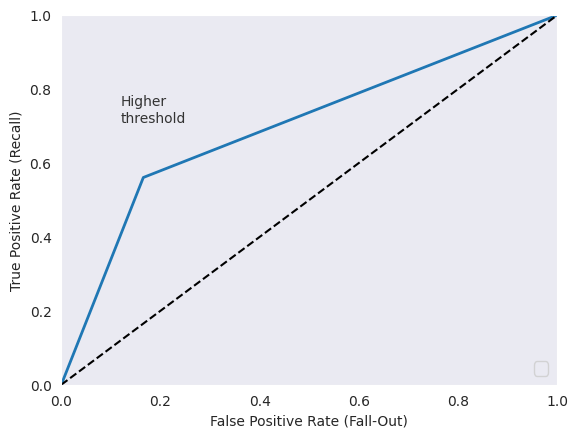

In [70]:
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_df_labels, y_train_pred)

0.6976400538919554

### Question 5: ROC Curve Analysis and Threshold Selection

The ROC curve for our logistic regression model is well above the diagonal, which signifies that our model performs significantly better than random guessing.

**Key Observations:**

1. **AUC Value**: The AUC is 0.69. This indicates that our model is quite effective, as an AUC of 0.5 would suggest a random model, while 1.0 represents a perfect model.
2. **Curve Shape**: The ROC curve increases sharply at lower thresholds, suggesting that the model is able to achieve a high true positive rate with relatively few false positives at these points.

**Choosing an Optimal Threshold for Diabetes Diagnosis:**

- **Lower Threshold (e.g., 0.3)**:
  - **Benefits**: Increases the detection of diabetes cases (higher True Positive Rate).
  - **Drawbacks**: More false positives (higher False Positive Rate).

- **Higher Threshold (e.g., 0.7)**:
  - **Benefits**: Reduces false positives (lower False Positive Rate).
  - **Drawbacks**: Misses more actual cases (lower True Positive Rate).

Given the importance of early detection in diabetes:
- **Prioritize a lower threshold** to ensure more cases are detected, even if it results in more false positives. A threshold around **0.3 to 0.4** would be a balanced choice, helping to catch more true cases while managing the number of false positives effectively


##Question 6: Fill in the following table for different probability threshold values

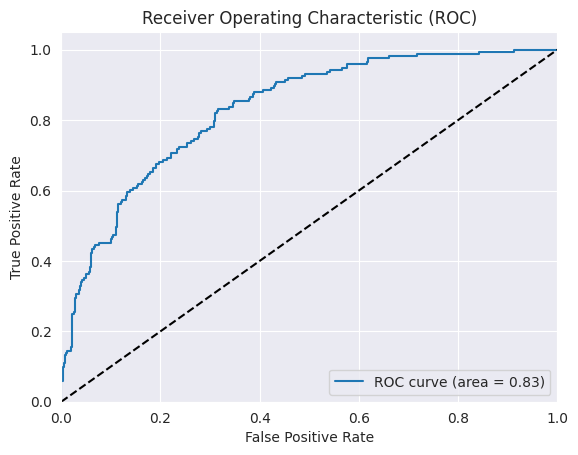

AUC Score: 0.83


In [78]:
from sklearn.metrics import roc_curve, auc
from itertools import tee
y_prob = model.predict_proba(train_prepared)[:, 1]
fpr, tpr, thresholds = roc_curve(train_df_labels, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc))

In [79]:
def evaluate_thresholds(model, train_prepared, train_labels, thresholds):
    results = []
    def calculate_metrics(threshold):
        y_prob = model.predict_proba(train_prepared)[:, 1]
        y_pred = (y_prob >= threshold).astype(int)
        accuracy = sgd_clf.score(train_prepared, y_pred)
        sensitivity = recall_score(train_df_labels, y_pred)
        f1 = f1_score(train_df_labels, y_pred)
        tn, fp, fn, tp = confusion_matrix(train_df_labels, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        return {'Threshold': threshold, 'Accuracy': accuracy, 'Sensitivity (Recall)': sensitivity, 'F1 Score': f1, 'TPR': tpr, 'FPR': fpr}

    for threshold in thresholds:
        metrics = calculate_metrics(threshold)
        results.append(metrics)

    return pd.DataFrame(results)

thresholds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
results_df = evaluate_thresholds(model, train_prepared, train_df_labels, thresholds)
results_df

,Threshold,Accuracy,Sensitivity (Recall),F1 Score,TPR,FPR
0,0.0,0.169580,1.000000,0.464430,1.000000,1.000000
1,0.2,0.825175,0.433526,0.547445,0.433526,0.065163
2,0.4,0.830420,0.179191,0.291080,0.179191,0.022556
3,0.6,0.828671,0.069364,0.129032,0.069364,0.002506
4,0.8,0.830420,0.011561,0.022857,0.011561,0.000000
5,1.0,0.830420,0.000000,0.000000,0.000000,0.000000


## Question 7
### Summary of Extreme Threshold Values

**Threshold = 0:**
- **Accuracy**: 16.95% - Low accuracy because of many false positives.
- **Sensitivity (Recall)**: 100% - Detects all actual positive cases, but also incorrectly classifies many negatives as positives.
- **F1 Score**: 46.64% - Balanced score reflecting the trade-off between precision and recall.
- **True Positive Rate (TPR)**: 100% - Perfect recall, as it identifies all true positives.
- **False Positive Rate (FPR)**: 100% - All true negatives are misclassified as positives.

**Threshold = 1:**
- **Accuracy**: 83.04% - High accuracy but misleading because no positives are detected.
- **Sensitivity (Recall)**: 0% - Fails to detect any positive cases.
- **F1 Score**: 0% - No valid F1 score since no positives are predicted.
- **True Positive Rate (TPR)**: 0% - No true positives identified.
- **False Positive Rate (FPR)**: 0% - No false positives because no positives are predicted.

###Comments:
- **Threshold = 0**: Best for scenarios where finding all positive cases is crucial, even if it means many false positives.
- **Threshold = 1**: Provides high accuracy but misses all positive cases, which is not suitable if identifying positives is important.

In [80]:
prediction = sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.7517482517482518


## Question 8
### What do the metrics of Sensitivity and Recall contribute compared to Accuracy?

- **Accuracy **is a general metric, but it does not provide detailed insights into how well the model performs on each individual class, especially in imbalanced datasets.
**Sensitivity (Recall)**, on the other hand, focuses specifically on the ability to correctly identify the positive class, which can be crucial in applications where false negatives are costly (e.g., medical diagnoses, fraud detection).

**High Sensitivity (Recall):** If the goal is to catch as many positive cases as possible (e.g., in medical screening where missing a positive case can have serious consequences) such as in this dataset , sensitivity is more important than accuracy.

**High Accuracy:** If you have a balanced dataset and are more concerned with overall correctness, accuracy can be a good metric. However, even in balanced datasets, sensitivity and specificity provide a more comprehensive understanding of model performance especially when errors on different classes (positive vs. negative) have different consequences.


## Question 9
### Threshold for Diabetes Screening

A **threshold of 0.3 to 0.5** is advisable for screening individuals for diabetes.

**Reasoning**: This range ensures high sensitivity, meaning most potential diabetes cases are detected, even if it results in more false positives. The focus is on capturing as many true cases as possible, with follow-up tests to confirm the diagnosis.

# Exercise 3. Imbalanced Data

In [75]:

url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/diabetesDes.csv'
diabetesDF = pd.read_csv(url)


columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    diabetesDF[column] = diabetesDF[column].replace(0, np.nan)

for column in columns_to_check:
    median = diabetesDF[column].median()
    diabetesDF[column].fillna(median, inplace=True)

dfTrain, dfTest = train_test_split(diabetesDF, test_size=0.2, random_state=42)

trainLabel = np.asarray(dfTrain["Outcome"])
trainData = np.asarray(dfTrain.iloc[:, 0:8])
testLabel = np.asarray(dfTest["Outcome"])
testData = np.asarray(dfTest.iloc[:, 0:8])

# Normalize the training and testing data
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means) / stds
testData = (testData - means) / stds

# Create the Logistic Regression model
model = LogisticRegression()
model.fit(trainData, trainLabel)

accuracy = model.score(testData, testLabel)
print("Accuracy = {:.2f}%".format(accuracy * 100))

Accuracy = 87.50%


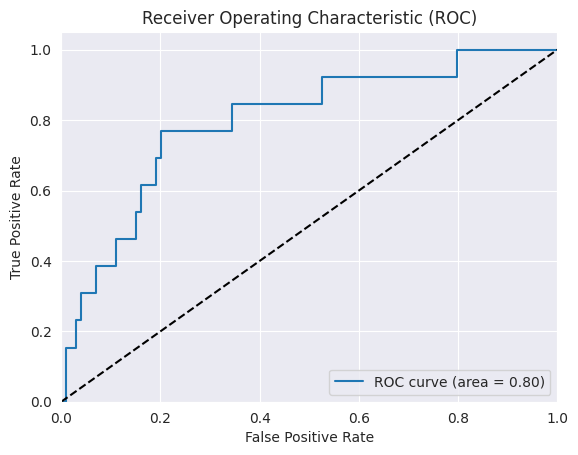

AUC Score: 0.80


In [76]:
y_prob = model.predict_proba(testData)[:, 1]
fpr, tpr, thresholds = roc_curve(testLabel, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc))

In [77]:
def evaluate_thresholds(model, train_prepared, test_labels, thresholds):
    results = []
    def calculate_metrics(threshold):
        y_prob = model.predict_proba(train_prepared)[:, 1]
        y_pred = (y_prob >= threshold).astype(int)
        accuracy = sgd_clf.score(train_prepared, y_pred)
        sensitivity = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        return {'Threshold': threshold, 'Accuracy': accuracy, 'Sensitivity (Recall)': sensitivity, 'F1 Score': f1, 'TPR': tpr, 'FPR': fpr}

    for threshold in thresholds:
        metrics = calculate_metrics(threshold)
        results.append(metrics)

    return pd.DataFrame(results)

thresholds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
results_df = evaluate_thresholds(model, testData, testLabel, thresholds)
results_df

,Threshold,Accuracy,Sensitivity (Recall),F1 Score,TPR,FPR
0,0.0,0.214286,1.000000,0.208000,1.000000,1.000000
1,0.2,0.875000,0.461538,0.363636,0.461538,0.141414
2,0.4,0.848214,0.230769,0.300000,0.230769,0.040404
3,0.6,0.812500,0.153846,0.250000,0.153846,0.010101
4,0.8,0.794643,0.000000,0.000000,0.000000,0.010101
5,1.0,0.785714,0.000000,0.000000,0.000000,0.000000


## comments

1. **High Accuracy with Imbalanced Data**: The model shows high accuracy with the imbalanced dataset, but this metric is misleading. The model can predict most cases as non-diabetic (the majority class) and still maintain a high accuracy score, even though it's not detecting diabetic cases well.

2. **High Thresholds Miss Diabetic Patients**: As the threshold increases beyond 0.6, the model becomes overly conservative and stops identifying diabetic patients (Sensitivity drops to 0.00 at threshold 0.8 or above). In healthcare, missing diabetic cases (false negatives) is risky, making higher thresholds unsuitable.

3. **Lower Threshold Recommended**: A lower threshold, around 0.2 to 0.4, strikes a better balance between accuracy and recall. Although recall isn't perfect, this range ensures more diabetic patients are flagged for further testing, which is crucial in real-world scenarios where missing a diagnosis can be harmful.